In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Text(0.5, 1.0, 'Calibration For Muons Entering Top and Exiting Bottom')

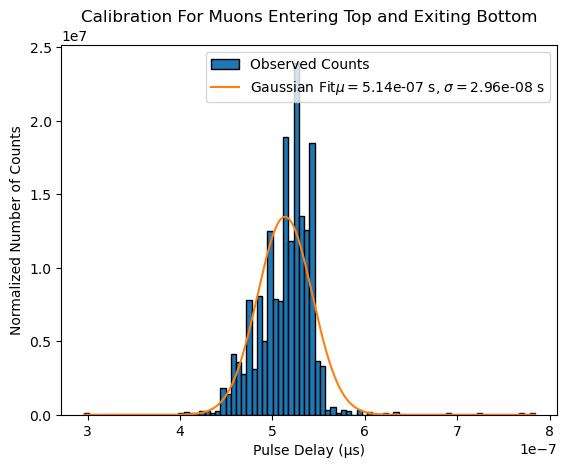

In [51]:
data = np.loadtxt('data/Callibration1_1_4.txt', dtype=float, delimiter='\t', skiprows=4, usecols=6)
filtered = data < 8e-7
data = data[filtered]


fit = sp.stats.norm.fit(data)
x_vals = np.linspace(data.min(), data.max(), 1000)

plt.hist(data, bins='auto', density='True', edgecolor='k', label="Observed Counts")
plt.plot(x_vals, sp.stats.norm.pdf(x_vals, *fit), label="Gaussian Fit" + r"$\mu = $" + f"{fit[0]:.3} s, " + r"$\sigma = $" + f"{fit[1]:.3} s")
plt.legend()

plt.xlabel("Pulse Delay (µs)")
plt.ylabel("Normalized Number of Counts")
plt.title("Calibration For Muons Entering Top and Exiting Bottom")

In [83]:
data = np.loadtxt("Data/090623-090723_data.txt", dtype=float, delimiter='\t', skiprows=4, usecols=3)
filtered = data > 2e-6
#data = data[filtered]

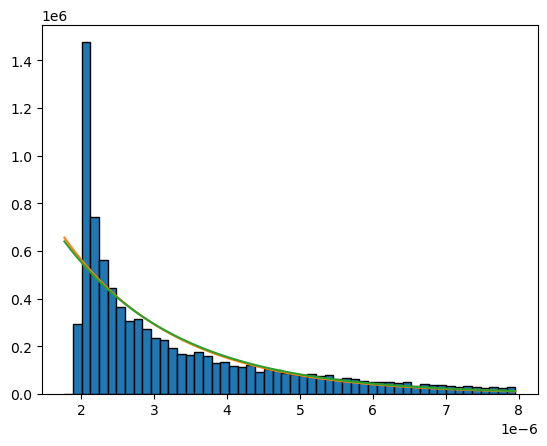

In [84]:
fit = sp.stats.expon.fit(data)
xvals = np.linspace(np.min(data), np.max(data), 1000)


counts, bins, _ = plt.hist(data, bins='auto', edgecolor='k', density=True)

centers = (bins[1:] + bins[:-1]) / 2

def dist(x, k, T):
    return np.exp(-(x - k) / T)

binned_fit, _ = sp.optimize.curve_fit(dist, centers, counts)

plt.plot(xvals, sp.stats.expon.pdf(xvals, *fit))
plt.plot(xvals, dist(xvals, *binned_fit))

plt.show()

In [85]:
fit

(1.772e-06, 1.5232489445226282e-06)

In [51]:
delay = np.loadtxt('data/Delay_callibration.txt', dtype=float, delimiter='\t', skiprows=5, usecols=(3))
delay *= 1e6

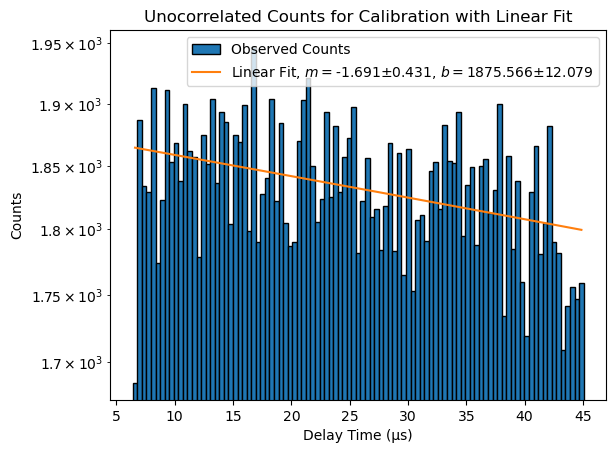

In [52]:
freq, bins = np.histogram(delay, bins=100)

freq = freq[:-1]
bins = bins[:-1]

centers = (bins[1:] + bins[:-1]) / 2

#reg = sp.stats.linregress(centers, freq)
p, cov = np.polyfit(centers, freq, deg=1, cov=True)
xvals = np.linspace(centers[0], centers[-1], 1000)

err = np.sqrt(np.diag(cov))

plt.hist(bins[:-1], bins=bins, edgecolor='k', weights=freq, label="Observed Counts")
plt.plot(xvals, p[0] * xvals + p[1], label="Linear Fit, " + r"$m = $" + f"{p[0]:.3f}±{err[0]:.3f}, " + r"$b = $" + f"{p[1]:.3f}±{err[1]:.3f}")
plt.legend()

plt.title("Unocorrelated Counts for Calibration with Linear Fit")
plt.xlabel("Delay Time (µs)")
plt.ylabel("Counts")
plt.yscale('log')

In [41]:
freq

array([22892.15844185, 25636.50028473, 24916.45019724, 24848.5209437 ,
       25989.73240312, 24101.2991548 , 24767.00583946, 25962.5607017 ,
       25174.58136068, 25378.36912129, 24970.79360007, 25813.11634392,
       25296.85401704, 25228.92476351, 24169.22840834, 25473.47007624,
       25147.40965926, 25867.45974675, 24943.62189865, 25718.01538897,
       25609.32858331, 24508.87467602, 25473.47007624, 25391.954972  ,
       25799.53049322, 24440.94542248, 26451.65132717, 24318.67276612,
       24834.935093  , 24997.96530148, 25867.45974675, 24753.41998875,
       25595.74273261, 24522.46052673, 24277.91521399, 24318.67276612,
       25405.5408227 , 25853.87389604, 26098.41920878, 25133.82380856,
       24536.04637743, 24780.59169017, 25718.01538897, 24794.17754087,
       25568.57103119, 24848.5209437 , 25228.92476351, 25432.71252412,
       25772.3587918 , 24209.98596046, 24753.41998875, 25215.3389128 ,
       24590.38978026, 24671.90488451, 24237.15766187, 24699.07658592,
      

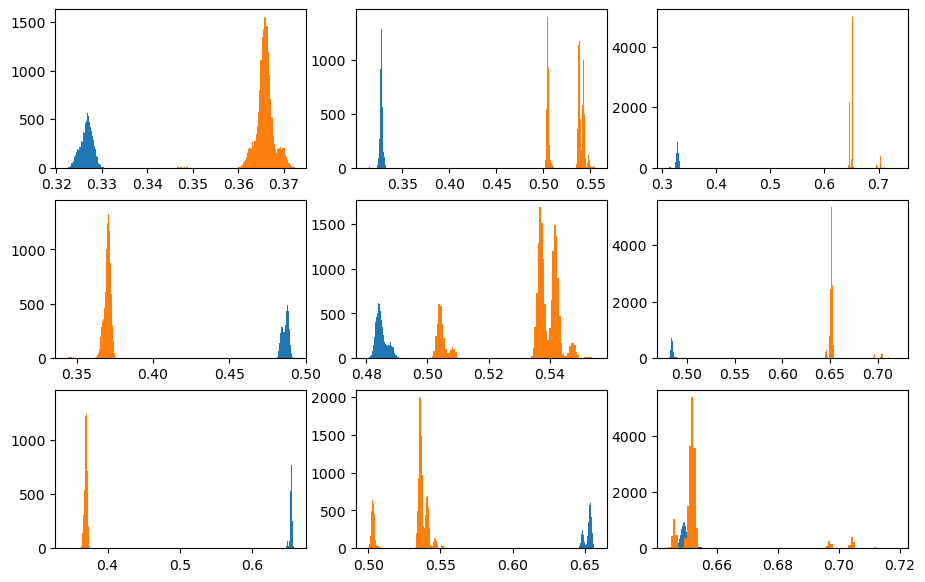

In [67]:
fig, axs = plt.subplots(3, 3, figsize=(11, 7))

for i in range(9):
    data = np.loadtxt(f'Data/Linear_Callibration_{i + 1}.txt', skiprows=4, usecols=(1, 4))
    axs[i // 3, i % 3].hist(data[:, 0], bins=100)
    axs[i // 3, i % 3].hist(data[:, 1], bins=100)


(array([5.000e+00, 1.900e+01, 7.800e+01, 2.440e+02, 3.780e+02, 6.090e+02,
        5.810e+02, 3.810e+02, 2.220e+02, 1.010e+02, 5.500e+01, 6.200e+01,
        9.000e+01, 1.200e+02, 1.010e+02, 6.500e+01, 1.700e+01, 3.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 2.500e+01, 1.130e+02, 3.500e+02, 7.330e+02, 1.290e+03,
        1.689e+03, 1.515e+03, 1.106e+03, 6.060e+02, 2.980e+02, 2.000e+02,
        3.330e+02, 6.540e+02, 1.197e+03, 1.483e+03, 1.361e+03, 8.980e+02,
        4.740e+02, 1.700e+02, 4.300e+0

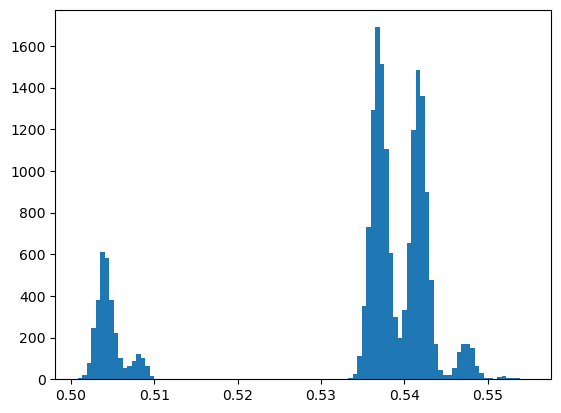

In [71]:
data = np.loadtxt(f'Data/Linear_Callibration_5.txt', skiprows=4, usecols=(1, 4))

plt.hist(data[:, 1], bins=100)